# Load Global Libraries

In [4]:
from signal_extraction import *
from mlutils import *
import os


# Load Data

In [5]:
subjects=os.listdir(BASE_EXTRACTION_PATH)
Fs=2000
init=False
for s in subjects[:1]:
    for f in range(2,5):
        t, ang, emg=read_extracted_combined_data(s, f)
        ang_dot=np.zeros(len(ang))
        ang_dot[:-1]=(ang[1:]-ang[:-1])*Fs
        ang_dot[-1]=ang_dot[-2]

        if not init:
            X_data=np.array(emg[:3])            
            y_data=np.array(ang).reshape((1,len(ang)))
            yv_data=np.array(ang_dot).reshape((1,len(ang_dot)))
            init=True
        else:
            X_data=np.c_[X_data,np.array(emg[:3])]
            y_data=np.c_[y_data,np.array(ang).reshape((1,len(ang)))]
            yv_data=np.c_[yv_data,np.array(ang_dot).reshape((1,len(ang_dot)))]

X_data=X_data.T
y_data=y_data.T
yv_data=yv_data.T
yt_data=0.4*9.8*0.25*np.sin(y_data)
print(f'{X_data.shape} and {y_data.shape}')



(227821, 3) and (227821, 1)


In [6]:
X=X_data
y=y_data

Text(0, 0.5, 'Elbow Angle')

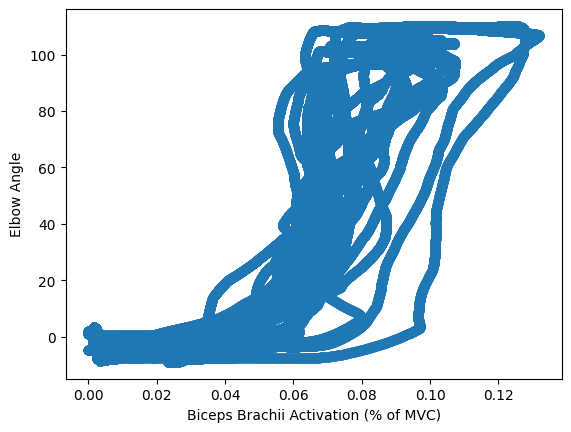

In [7]:
import matplotlib.pyplot as plt

muscle_index=0
muscles=['Biceps Brachii', 'Triceps Lateral', 'Triceps Medial']
plt.scatter(X_data[:,muscle_index], y_data[:,0])
plt.xlabel(f'{muscles[muscle_index]} Activation (% of MVC)')
plt.ylabel('Elbow Angle')

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y)

X_train.shape

(170865, 3)

In [ ]:
import tensorflow as tf
import numpy as np

class NNModel:
    def __init__(self):
        self.model = tf.keras.Sequential([
            tf.keras.layers.Dense(12, activation='sigmoid', input_shape=(3,)),
            tf.keras.layers.Dense(12),
            tf.keras.layers.Dense(12),
            tf.keras.layers.Dense(3),
            tf.keras.layers.Dense(1)
        ])

        self.model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='mse'
        )

    def fit(self, X, y, nepochs=25, batch_size=10):
        X = np.array(X, dtype=np.float32)
        y = np.array(y, dtype=np.float32)

        history = self.model.fit(X, y, epochs=nepochs, batch_size=batch_size, verbose=1)

        # Predict and calculate RMSE
        y_pred = self.model.predict(X)
        rmse = np.sqrt(np.mean((y_pred - y)**2))
        print(f"RMSE: {rmse}")

    def predict(self, X):
        X = np.array(X, dtype=np.float32)
        return self.model.predict(X)


In [ ]:
m=NNModel()
m.fit(X_train,y_train, 40, 100)

Epoch 1/40
1709/1709 [==============================] - 2s 941us/step - loss: 2881.1934
Epoch 2/40
1709/1709 [==============================] - 2s 924us/step - loss: 2209.1689
Epoch 3/40
1709/1709 [==============================] - 2s 940us/step - loss: 2126.6650
Epoch 4/40
1709/1709 [==============================] - 2s 928us/step - loss: 2013.5463
Epoch 5/40
1709/1709 [==============================] - 2s 937us/step - loss: 1812.0878
Epoch 6/40
1709/1709 [==============================] - 2s 957us/step - loss: 1359.0272
Epoch 7/40
1709/1709 [==============================] - 2s 923us/step - loss: 851.2891
Epoch 8/40
1709/1709 [==============================] - 2s 963us/step - loss: 744.7976
Epoch 9/40
1709/1709 [==============================] - 2s 946us/step - loss: 683.1287
Epoch 10/40
1709/1709 [==============================] - 2s 945us/step - loss: 610.0298
Epoch 11/40
1709/1709 [==============================] - 2s 924us/step - loss: 517.3349
Epoch 12/40
1709/1709 [============

In [21]:
t,ang_n,emg_n=read_extracted_combined_data('Abhoy',2)

X_plot=np.array(emg_n[:3]).T
y_plot=m.model.predict(X_plot)

2173/2173 [==============================] - 2s 760us/step


In [22]:
%matplotlib qt
plt.plot(t,ang_n, t, y_plot)
plt.xlabel('Time')
plt.ylabel('Elbow Angle')
plt.legend(['Actual', 'Predicted'])
plt.title('All Subjects, Different Activities')

Text(0.5, 1.0, 'All Subjects, Different Activities')